# Scikit-Learn

**Scikit-learn (sklearn)** is a versatile library that offers a wide range of machine learning models.
In the following code, we will implement Machine Learning (ML) models using this library. 

To build a ML model, you need to do the following:
1. Load and prepare the data.
2. Split the data into training and testing sets.
3. Preprocess Data if necessary.
4. Choose a ML Model and train it. 
5. Make predictions and evaluate them

Notes:
* you can go to <https://drawdata.xyz/> to get the CSV file from a drawn data.
* Some code bellow uses the same data for training and testing which is not optimal in real cases but it gives simple way of implementation. 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Basics of Machine Learning Modeling

### Open and Split Data
This data is used for the next three lessons

In [2]:
# open the database from CSV file. 
path = r"D:\Programming\Practice Python\Data\Two Variables\Dataset (2).csv" # you can choose of the 8 datasets from here
df = pd.read_csv(path)

# Create a scatter plot (if needed)
"""
plt.figure(figsize=(4, 4))
plt.scatter(df['input_voltage'], df['el_power'], alpha=0.7)
plt.title('Scatter Plot of Voltage vs Power')
plt.xlabel('Voltage')
plt.ylabel('Power')
plt.grid(True)
plt.show()
"""
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11819 entries, 0 to 11818
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   time           11819 non-null  float64
 1   input_voltage  11819 non-null  float64
 2   el_power       11819 non-null  float64
dtypes: float64(3)
memory usage: 277.1 KB


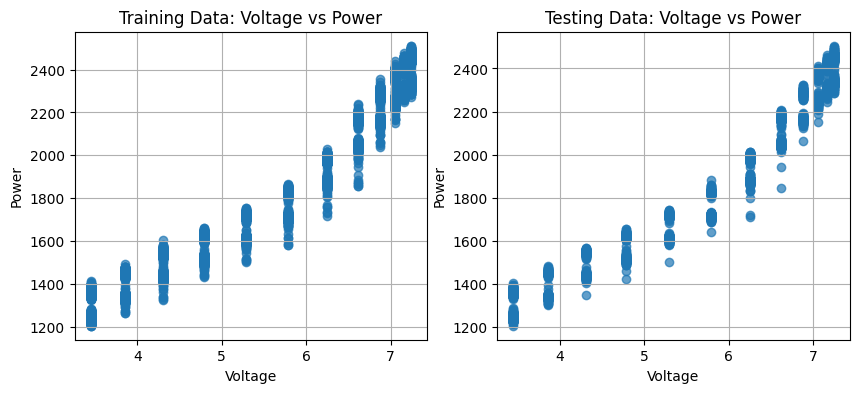

In [3]:
# split the data to traning and testing data
from sklearn.model_selection import train_test_split

# Extract input features (x) and target variable (y)
x = df[['input_voltage']]  # Note: x should be a DataFrame, hence double brackets
y = df['el_power']

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) # using 20% for testing

# Create a scatter plot to check the training and testing data
plt.figure(figsize=(10, 4))

# Create a plot for the training data 
plt.subplot(1, 2, 1)  # rows, columns, panel selected
plt.scatter(x_train, y_train, alpha=0.7)
plt.title('Training Data: Voltage vs Power')
plt.xlabel('Voltage')
plt.ylabel('Power')
plt.grid(True)

# create plot for the testing data
plt.subplot(1, 2, 2)
plt.scatter(x_test, y_test, alpha=0.7)
plt.title('Testing Data: Voltage vs Power')
plt.xlabel('Voltage')
plt.ylabel('Power')
plt.grid(True)

plt.show()

## Linear Regression ML Model
This model uses a direct method that involves three basic steps which are **Data, Model, Predict**.

In [4]:
# Train the model and make prediction

# ML model using Linear Regression 
from sklearn.linear_model import LinearRegression

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

#### Evaluate the model

We have the following metrics to evaluate regression model performance 
1. *Mean Squared Error*: MSE measures the average squared difference between the predicted values and actual values. Lower values indicate better model performance. It’s sensitive to outliers because errors are squared.
2. *Root Mean Squared Error*: RMSE is the square root of the MSE, providing error in the same units as the response variable. It helps to understand the magnitude of error in a more interpretable way. Like MSE, it’s sensitive to outliers. 
3. *Mean Absolute Error*: MAE measures the average absolute difference between the predicted and actual values. It’s less sensitive to outliers than MSE and provides a straightforward interpretation of the average prediction error.
4. *R-squared (R²)*: R² represents the proportion of the variance in the dependent variable that is predictable from the independent variables. It ranges from 0 to 1, with 1 indicating a perfect fit. Negative values can occur when the model performs worse than a simple mean model.
5. *Explained Variance Score*: EVS measures the proportion of the variance in the dependent variable that is explained by the model. It’s similar to R² but focuses directly on variance. Like R², it ranges from 0 to 1.
6. *Mean Absolute Percentage Error (MAPE)*: MAPE represents the average percentage error between the predicted and actual values. It’s useful for understanding the prediction accuracy in percentage terms. Note that MAPE can be undefined if any actual values are zero.
7. *Median Absolute Error*: This metric provides the median of the absolute errors, offering a robust measure that is less sensitive to outliers than MAE. It reflects the typical error size for the model’s predictions.

In [5]:
# Evaluate the model using statistical methods 
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score, median_absolute_error

mse = mean_squared_error(y_test, y_pred) # Mean Squared Error
print(f"Mean Squared Error: {mse}")

rmse = np.sqrt(mse)  # Root Mean Squared Error
print(f"Root Mean Squared Error: {rmse}")

mae = mean_absolute_error(y_test, y_pred) # Mean Absolute Error
print(f"Mean Absolute Error: {mae}")

r2 = r2_score(y_test, y_pred) # R-squared (R²)
print(f"R^2 Score: {r2}")

evs = explained_variance_score(y_test, y_pred) # Explained Variance Score
print(f"Explained Variance Score: {evs}")

mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100 # Mean Absolute Percentage Error (MAPE)
print(f"Mean Absolute Percentage Error: {mape}%")

median_error = median_absolute_error(y_test, y_pred) # Median Absolute Error
print(f"Median Absolute Error: {median_error}")


Mean Squared Error: 8979.614887127418
Root Mean Squared Error: 94.76082992000133
Mean Absolute Error: 77.30279204773771
R^2 Score: 0.9439030198479803
Explained Variance Score: 0.9439077793003232
Mean Absolute Percentage Error: 4.356142681474032%
Median Absolute Error: 70.72026735896327


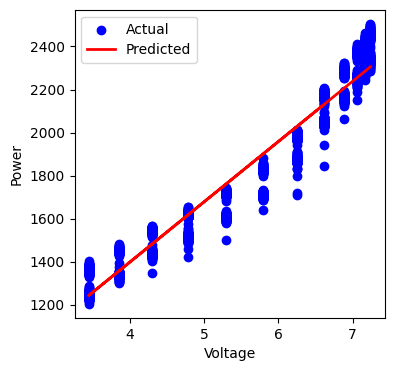

In [6]:
# Compare predict and actual results using scatter plot
plt.figure(figsize=(4, 4))
plt.scatter(x_test, y_test, color='blue', label='Actual')
plt.plot(x_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Voltage')
plt.ylabel('Power')
plt.legend()
plt.show()

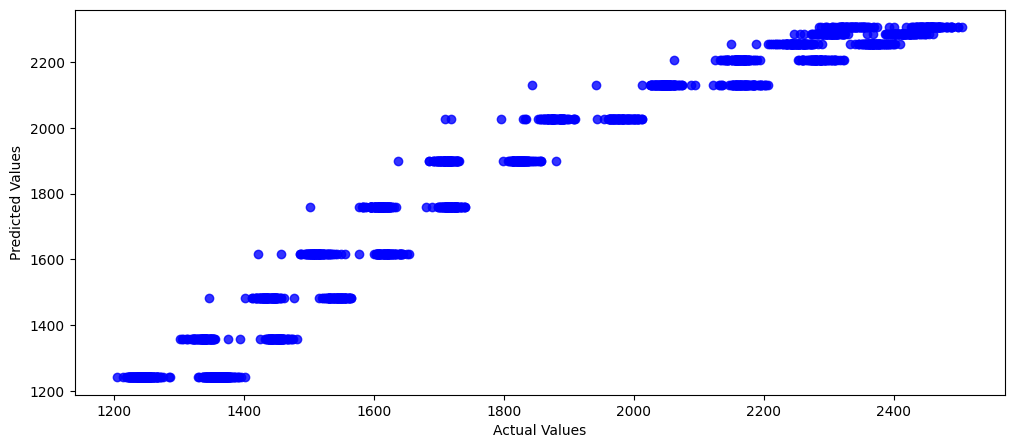

In [7]:
# compare predict and actual results using scatter plot linearity 
""" Using this method, if the scatter plot is linear, the predictions are accurate"""
plt.figure(figsize=(12, 5))
plt.scatter(y_test, y_pred, color='blue', alpha = 0.8)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

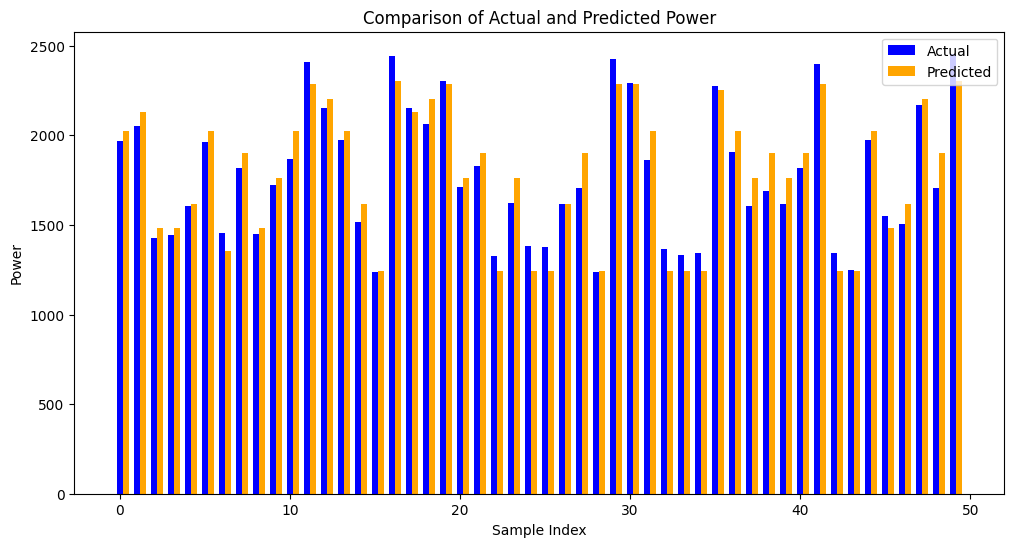

In [8]:
# Randomly select n unique values to make bar plot to compare predicted and actual results
n = 50;
# selet random indices
indices = np.arange(x_test.size+1)
sample_indices = np.random.choice(indices, size= n, replace=False) # select a sample with size n

# Select the corresponding y_test and y_pred values
y_test_sample = y_test.iloc[sample_indices].values
y_pred_sample = y_pred[sample_indices]

# Create a bar plot to compare y_test and y_pred
bar_width = 0.35
index = np.arange(n)
plt.figure(figsize=(12, 6))
plt.bar(index, y_test_sample, bar_width, label='Actual', color='blue')
plt.bar(index + bar_width, y_pred_sample, bar_width, label='Predicted', color='orange')
plt.xlabel('Sample Index')
plt.ylabel('Power')
plt.title('Comparison of Actual and Predicted Power')
plt.legend()
plt.legend(loc='upper right')
plt.show()

## K-Nearest Neighbors (KNN) ML Model
Here, we have used the basic steps data, model, preidct. We have also implemented a **pipline**

In [9]:
# Train the model 
""" Note here how the parameters of model can be adjusted to get better results
    We can also use the function get_params() to know what are these parameters"""

# ML model using K-Nearest Neighbors (KNN)
"""
from sklearn.neighbors import KNeighborsRegressor

# Create a K-Nearest Neighbors model
knn_model = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors
#print(knn_model.get_params()) # print the parameters of the knn model if needed

# Train the model
knn_model.fit(x_train, y_train)

# Make predictions
y_pred = knn_model.predict(x_test)
"""
# ML model using a pipeline of scaling data and K-Nearest Neighbors (KNN)

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

# Define the pipeline steps
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scale the data
    ('knn', KNeighborsRegressor(n_neighbors=15))  # KNN regression step
])

# Train the model using the pipeline
pipeline.fit(x_train, y_train)
# print(pipeline.get_params()) # print the parameters of the pipeline if needed

# Make predictions using the pipeline
y_pred = pipeline.predict(x_test)

In [10]:
# Evaluate the model using statistical methods 
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score, median_absolute_error

mse = mean_squared_error(y_test, y_pred) # Mean Squared Error
print(f"Mean Squared Error: {mse}")

rmse = np.sqrt(mse)  # Root Mean Squared Error
print(f"Root Mean Squared Error: {rmse}")

mae = mean_absolute_error(y_test, y_pred) # Mean Absolute Error
print(f"Mean Absolute Error: {mae}")

r2 = r2_score(y_test, y_pred) # R-squared (R²)
print(f"R^2 Score: {r2}")

evs = explained_variance_score(y_test, y_pred) # Explained Variance Score
print(f"Explained Variance Score: {evs}")

mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100 # Mean Absolute Percentage Error (MAPE)
print(f"Mean Absolute Percentage Error: {mape}%")

median_error = median_absolute_error(y_test, y_pred) # Median Absolute Error
print(f"Median Absolute Error: {median_error}")


Mean Squared Error: 3948.4158866897637
Root Mean Squared Error: 62.836421657266285
Mean Absolute Error: 57.77617699704235
R^2 Score: 0.9753336629229975
Explained Variance Score: 0.9755880027058779
Mean Absolute Percentage Error: 3.2963558615869424%
Median Absolute Error: 56.47284004129369


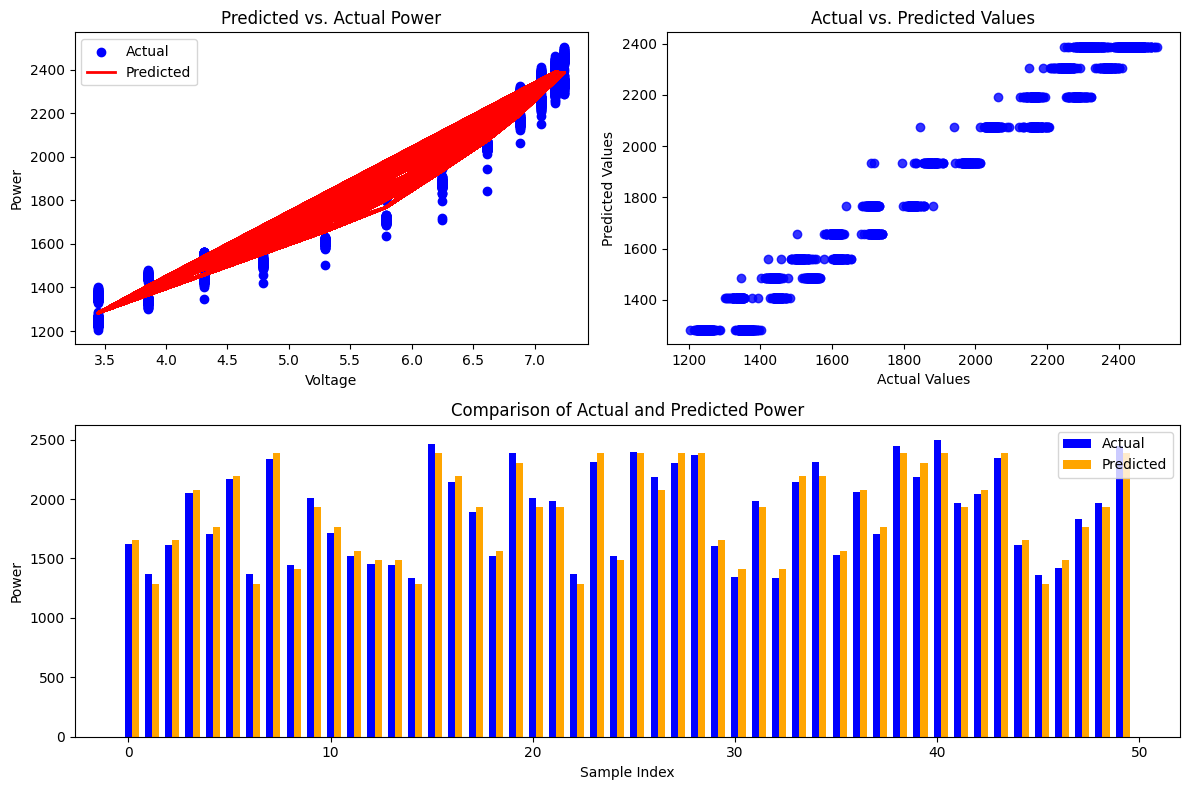

In [11]:
# Evaluate the model using graphs

# Randomly select n unique values to make bar plot to compare predicted and actual results
n = 50;
# selet random indices
indices = np.arange(x_test.size+1)
sample_indices = np.random.choice(indices, size= n, replace=False) # select a sample with size n

# Select the corresponding y_test and y_pred values
y_test_sample = y_test.iloc[sample_indices].values
y_pred_sample = y_pred[sample_indices]

plt.figure(figsize=(12, 8))

ax1 = plt.subplot2grid((2,2), (0,0), colspan=1)
ax1.scatter(x_test, y_test, color='blue', label='Actual')
ax1.plot(x_test, y_pred, color='red', linewidth=2, label='Predicted')
ax1.set_xlabel('Voltage')
ax1.set_ylabel('Power')
ax1.legend()
ax1.set_title('Predicted vs. Actual Power')

ax2 = plt.subplot2grid((2,2), (0,1), colspan=1)
ax2.scatter(y_test, y_pred, color='blue', alpha=0.8)
ax2.set_xlabel('Actual Values')
ax2.set_ylabel('Predicted Values')
ax2.set_title('Actual vs. Predicted Values')

ax3 = plt.subplot2grid((2,2), (1,0), colspan=2)
bar_width = 0.35
index = np.arange(n)
ax3.bar(index, y_test_sample, bar_width, label='Actual', color='blue')
ax3.bar(index + bar_width, y_pred_sample, bar_width, label='Predicted', color='orange')
ax3.set_xlabel('Sample Index')
ax3.set_ylabel('Power')
ax3.set_title('Comparison of Actual and Predicted Power')
ax3.legend(loc='upper right')

# Adjust layout
plt.tight_layout()
plt.show()

## Grid Search
Grid Search is a method inside sklean in which we can examine several parameters variation to find the best parameter.

In [12]:
# Train the model using Grid Search

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

# Define the pipeline steps
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scale the data
    ('knn', KNeighborsRegressor())  # KNN regression step (n_neighbors will be set by GridSearchCV)
])

# Define the parameter grid for GridSearchCV
param_grid = {
    # List of values to try for n_neighbors
    'knn__n_neighbors': [10, 20, 30, 40, 50, 100, 200, 300, 400, 500]  
}

# Initialize GridSearchCV with the pipeline, parameter grid, and number of cross-validation folds
grid_search = GridSearchCV(pipeline, param_grid, cv=3)

# Fit GridSearchCV to the data
grid_search.fit(x_train, y_train)

# Print the best parameters and best score
gridScores = pd.DataFrame(grid_search.cv_results_)
print("Best parameters found:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Make predictions using the best model found by GridSearchCV
y_pred = grid_search.predict(x_test)

print()
gridScores

Best parameters found: {'knn__n_neighbors': 400}
Best score: 0.9768186745651158



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_knn__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005146,0.001060,0.025008,0.004959,10,{'knn__n_neighbors': 10},0.974162,0.974069,0.974804,0.974345,0.000327,10
1,0.005042,0.000103,0.023306,0.001182,20,{'knn__n_neighbors': 20},0.975271,0.975783,0.975738,0.975598,0.000232,9
2,0.005313,0.000439,0.023703,0.000983,30,{'knn__n_neighbors': 30},0.975880,0.976278,0.975579,0.975912,0.000286,8
3,0.005658,0.000886,0.028150,0.000315,40,{'knn__n_neighbors': 40},0.975956,0.976179,0.976173,0.976103,0.000104,7
4,0.005414,0.000464,0.033599,0.001098,50,{'knn__n_neighbors': 50},0.976116,0.976472,0.976361,0.976316,0.000149,6
5,0.005599,0.000419,0.054994,0.000984,100,{'knn__n_neighbors': 100},0.976320,0.976954,0.976916,0.976730,0.000291,4
6,0.005157,0.000636,0.117215,0.009323,200,{'knn__n_neighbors': 200},0.976376,0.977018,0.977056,0.976817,0.000312,2
7,0.005423,0.000291,0.198957,0.010837,300,{'knn__n_neighbors': 300},0.976392,0.977019,0.977032,0.976814,0.000298,3
8,0.005660,0.000563,0.337663,0.011540,400,{'knn__n_neighbors': 400},0.976374,0.977049,0.977033,0.976819,0.000314,1
9,0.005512,0.000379,0.452521,0.020035,500,{'knn__n_neighbors': 500},0.976130,0.976982,0.977016,0.976709,0.000410,5


In [13]:
# Evaluate the model using statistical methods 
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score, median_absolute_error

mse = mean_squared_error(y_test, y_pred) # Mean Squared Error
print(f"Mean Squared Error: {mse}")

rmse = np.sqrt(mse)  # Root Mean Squared Error
print(f"Root Mean Squared Error: {rmse}")

mae = mean_absolute_error(y_test, y_pred) # Mean Absolute Error
print(f"Mean Absolute Error: {mae}")

r2 = r2_score(y_test, y_pred) # R-squared (R²)
print(f"R^2 Score: {r2}")

evs = explained_variance_score(y_test, y_pred) # Explained Variance Score
print(f"Explained Variance Score: {evs}")

mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100 # Mean Absolute Percentage Error (MAPE)
print(f"Mean Absolute Percentage Error: {mape}%")

median_error = median_absolute_error(y_test, y_pred) # Median Absolute Error
print(f"Median Absolute Error: {median_error}")

Mean Squared Error: 3665.6590848328774
Root Mean Squared Error: 60.54468667713854
Mean Absolute Error: 58.11386235620178
R^2 Score: 0.9771000864167658
Explained Variance Score: 0.9771018317790061
Mean Absolute Percentage Error: 3.3217457242260613%
Median Absolute Error: 57.073414627308125


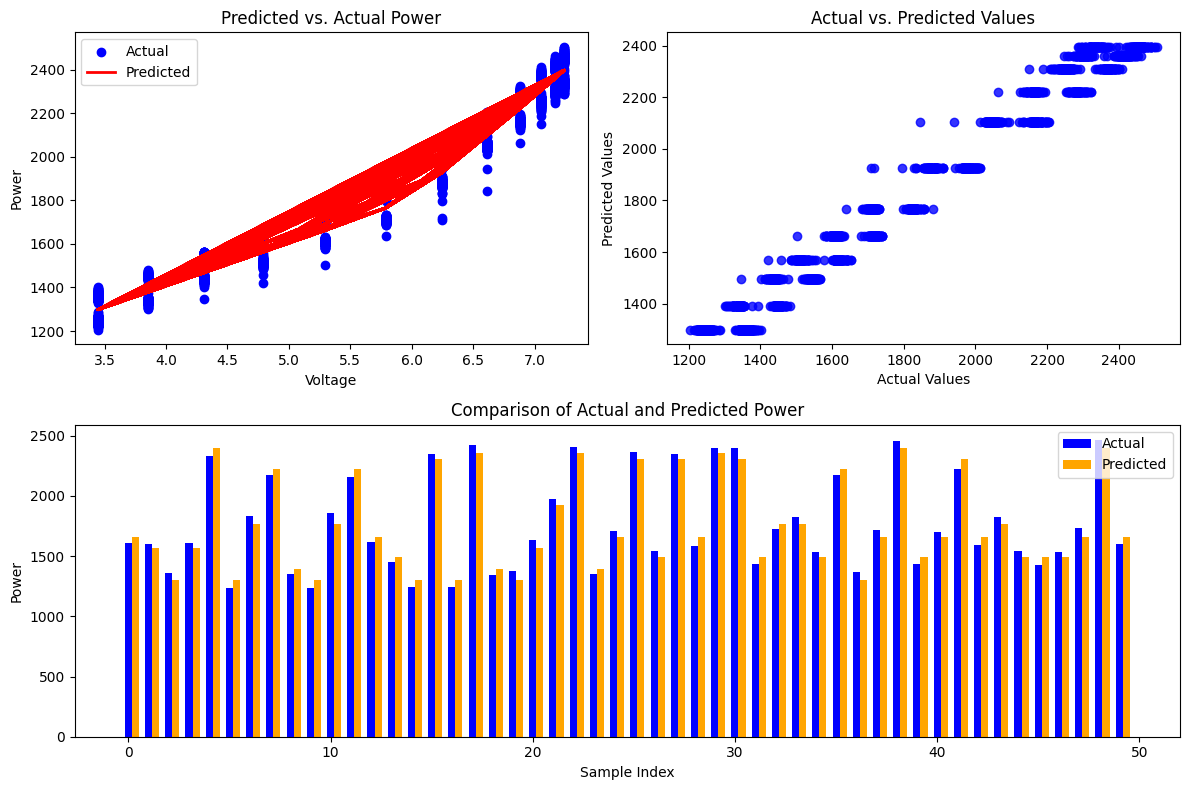

In [14]:
# Randomly select n unique values to make bar plot to compare predicted and actual results
n = 50;
# selet random indices
indices = np.arange(x_test.size+1)
sample_indices = np.random.choice(indices, size= n, replace=False) # select a sample with size n

# Select the corresponding y_test and y_pred values
y_test_sample = y_test.iloc[sample_indices].values
y_pred_sample = y_pred[sample_indices]

plt.figure(figsize=(12, 8))

ax1 = plt.subplot2grid((2,2), (0,0), colspan=1)
ax1.scatter(x_test, y_test, color='blue', label='Actual')
ax1.plot(x_test, y_pred, color='red', linewidth=2, label='Predicted')
ax1.set_xlabel('Voltage')
ax1.set_ylabel('Power')
ax1.legend()
ax1.set_title('Predicted vs. Actual Power')

ax2 = plt.subplot2grid((2,2), (0,1), colspan=1)
ax2.scatter(y_test, y_pred, color='blue', alpha=0.8)
ax2.set_xlabel('Actual Values')
ax2.set_ylabel('Predicted Values')
ax2.set_title('Actual vs. Predicted Values')

ax3 = plt.subplot2grid((2,2), (1,0), colspan=2)
bar_width = 0.35
index = np.arange(n)
ax3.bar(index, y_test_sample, bar_width, label='Actual', color='blue')
ax3.bar(index + bar_width, y_pred_sample, bar_width, label='Predicted', color='orange')
ax3.set_xlabel('Sample Index')
ax3.set_ylabel('Power')
ax3.set_title('Comparison of Actual and Predicted Power')
ax3.legend(loc='upper right')

# Adjust layout
plt.tight_layout()
plt.show()

## Sample and Class Weight
Class Weight is an estimator that assign the weight of the columns of the data. 
Sample Weight is an estimator that assign the weight for rows of the data.
The bellow model is used to detect fraud in transactions. The assigned weights can do the following:
* We assign Class weight of "Not Fraud" to be 1. We used Grid Search to select Class weight of "Fraud" to be selected from range (1 to 5). The higher the weight of "Fraud" is, the more likely the algorithm will detect fraud cases. 
* We assign the amount of money in the transaction to be a sample weight. Meaning, so much money will have higher probability to be selected as a fraud.

In [15]:
df  = pd.read_csv(r"D:\Programming\Practice Python\Data\Multi-Variables\Dataset (1).csv")[:80_000]


X = df.drop(columns=['Time', 'Amount', 'Class']).values # use columns V1 to V28 as predictor variables
y = df['Class'].values # use the class to check whether there is fraud or not as estimated variable
print(f"Shapes of X={X.shape} y={y.shape}, Fraud Cases={y.sum()}")


from sklearn.metrics import make_scorer, precision_score, recall_score
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import GridSearchCV


grid = GridSearchCV(
    estimator=LogisticRegression(max_iter=1000),
    # {0:1} means "Not Fraud" with weight 1. 
    # {1:2} means "Fraud" with weight 2. Change the weight and observe the difference!
    param_grid={'class_weight': [{0:1, 1:2}]},
    scoring={'precision': make_scorer(precision_score), 'recall_score': make_scorer(recall_score)},
    refit='recall_score',
    cv=3,
    n_jobs=-1
)

# Compare the results with and without sample weight
#grid.fit(X, y);
grid.fit(X, y, sample_weight = np.log(1+df['Amount'])); # use log() to get small values
pred = grid.predict(X)
print(f"Predicted Fraud Cases: {pred.sum()}")

Shapes of X=(80000, 28) y=(80000,), Fraud Cases=196
Predicted Fraud Cases: 163


# Data Preprocessing 
Data preprocessing might be done in several ways. For example, data splitting to training and testing which was shown before. In addition, data scaling which was also introduced before. 

## Standard Scaler, and Quantile Transformer
These two scaling methods can change the scale the axes with maintaining the shape of the data.
Notice here how Quantile Transformer can handle outliners 

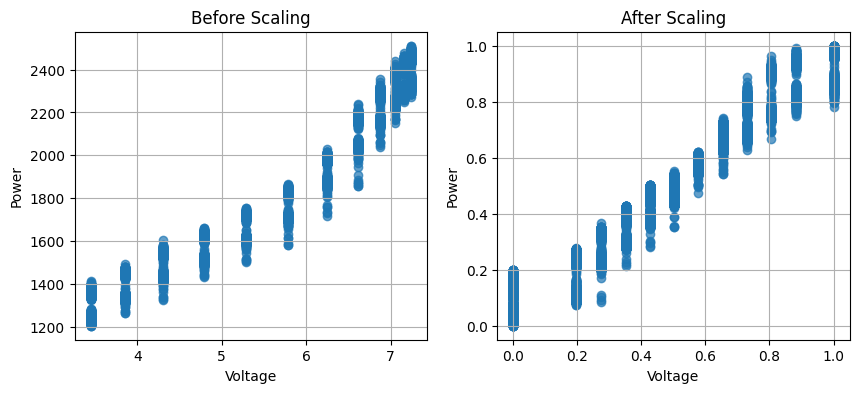

In [16]:
# open the database from CSV file. 
df = pd.read_csv(path)
# split the data to traning and testing data
from sklearn.model_selection import train_test_split
x = df[['input_voltage']]  # Note: x should be a DataFrame, hence double brackets
y = df['el_power']
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) # using 20% for testing

from sklearn.preprocessing import StandardScaler, QuantileTransformer

# Because y_train is not in 2D shape, you need to reshape it first before processing
y_train_array = y_train.to_numpy().reshape(-1, 1) # Convert y_train to a NumPy array and reshape for scaling
#y_train_new = StandardScaler().fit_transform(y_train_array)
y_train_new = QuantileTransformer().fit_transform(y_train_array)

#x_train_new = StandardScaler().fit_transform(x_train)
x_train_new = QuantileTransformer().fit_transform(x_train)

# Create a scatter plot to check the training and testing data
plt.figure(figsize=(10, 4))

# Create a plot for the training data 
plt.subplot(1, 2, 1)  # rows, columns, panel selected
plt.scatter(x_train, y_train, alpha=0.7)
plt.title('Before Scaling')
plt.xlabel('Voltage')
plt.ylabel('Power')
plt.grid(True)

# create plot for the testing data
plt.subplot(1, 2, 2)
plt.scatter(x_train_new, y_train_new, alpha=0.7)
plt.title('After Scaling')
plt.xlabel('Voltage')
plt.ylabel('Power')
plt.grid(True)

plt.show()

In [17]:
""" Consider a dataset of three variables in which we have two columns which are the values
    These values are then grouped using a third column """

path = r"D:\Programming\Practice Python\Data\Three Variables\DrawnData (2).csv" # you can choose of the 2 datasets from here

# open the database from CSV file. 
df = pd.read_csv(path)

# Assign values and colors inside two different variables 
X = df[['x', 'y']].values # we will assign both x and y axes in the dat inside X variable 
y = df['z'] == "a" # we will assign the grouping column inside y variable; it will use True and False values

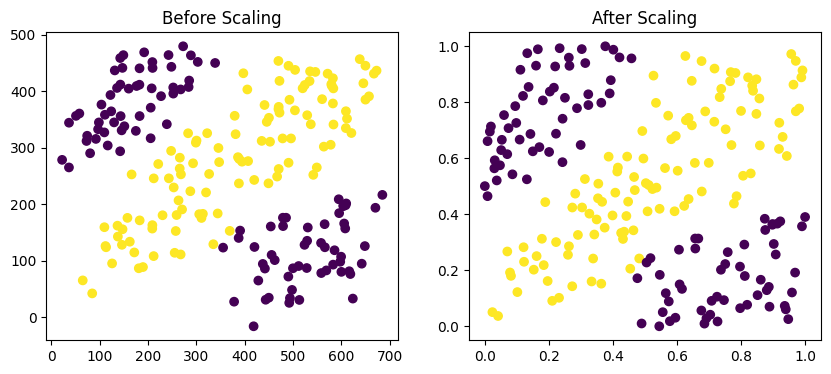

In [18]:
# Choose of the two scaling methods and examine its effect

from sklearn.preprocessing import StandardScaler, QuantileTransformer

#X_new = StandardScaler().fit_transform(X)
X_new = QuantileTransformer(n_quantiles=100).fit_transform(X) # This one works better with outliners
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('Before Scaling')
plt.subplot(1, 2, 2)
plt.scatter(X_new[:, 0], X_new[:, 1], c=y) # "c = y" will give two different colors to the values
plt.title('After Scaling');

### Effect of scalling on the ML model Output

In [19]:
path = r"D:\Programming\Practice Python\Data\Three Variables\DrawnData (1).csv" # you can choose of the 2 datasets from here

# open the database from CSV file. 
df = pd.read_csv(path)

# Assign values and colors inside two different variables 
X = df[['x', 'y']].values # we will assign both x and y axes in the dat inside X variable 
y = df['z'] == "a" # we will assign the color inside y variable

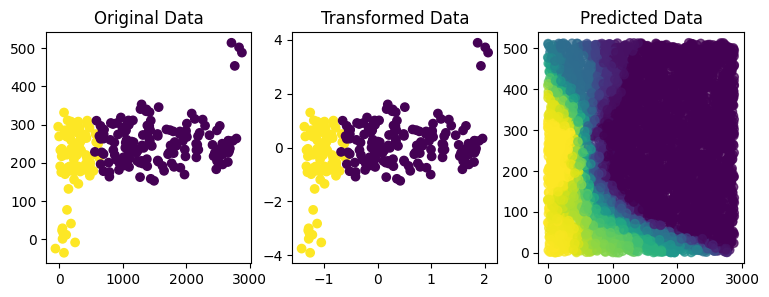

In [20]:
from sklearn.preprocessing import StandardScaler, QuantileTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline 

scaler = StandardScaler()
#scaler = QuantileTransformer(n_quantiles=100)

pipe = Pipeline([
    ("scale", scaler),
    ("model", KNeighborsClassifier(n_neighbors=20, weights='distance'))
])

pred = pipe.fit(X, y).predict(X)

plt.figure(figsize=(9, 3))
plt.subplot(131)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title("Original Data")

plt.subplot(132)
X_tfm = scaler.transform(X)
plt.scatter(X_tfm[:, 0], X_tfm[:, 1], c=y)
plt.title("Transformed Data")

"""Assume now we have an array that has values that covers the range x-axis (0 to 3000) and y-axis (0 to 500). 
    We will test the previously trained model to predict the group that the each value belongs to.
    This will be done by assigning a probability for each value whether it belongs to first or second group.
    The method "predict_proba()" is used to give p-value for each value"""
    
plt.subplot(133)
X_new = np.concatenate([
    np.random.uniform(0, X[:, 0].max(), (5000, 1)), 
    np.random.uniform(0, X[:, 1].max(), (5000, 1))
], axis=1) 
y_proba = pipe.predict_proba(X_new)
#plt.scatter(X_new[:, 0], X_new[:, 1])
plt.scatter(X_new[:, 0], X_new[:, 1], c=y_proba[:, 1], alpha=0.7)
plt.title("Predicted Data");

## Logistic Regresion
The use of logistic regression is introduced here. 
Note how StandardScaler, and QuantileTransformer are not always accurate as shown in this model. 

In [21]:
path = r"D:\Programming\Practice Python\Data\Three Variables\DrawnData (2).csv" # you can choose of the 2 datasets from here

# open the database from CSV file. 
df = pd.read_csv(path)

# Assign values and colors inside two different variables 
X = df[['x', 'y']].values # we will assign both x and y axes in the dat inside X variable 
y = df['z'] == "a" # we will assign the groups inside y variable using True or False

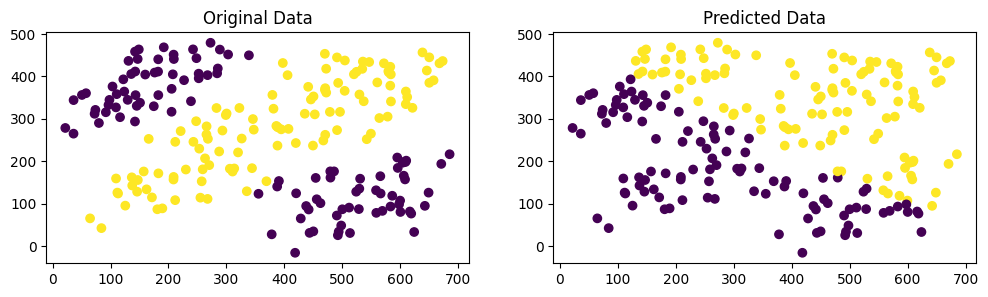

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, QuantileTransformer
from sklearn.pipeline import Pipeline

# Notice here how both StandardScaler, QuantileTransformer are bad scalers and cause less accuracy in the model 
#scaler = StandardScaler()
#scaler = QuantileTransformer(n_quantiles=100)
#scaler = PolynomialFeatures()

pipe = Pipeline([
    ("scale", scaler),
    ("model", LogisticRegression())
])

pred = pipe.fit(X, y).predict(X)

plt.figure(figsize=(12, 3))
plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title("Original Data")

plt.subplot(122)
X_tfm = scaler.transform(X)
plt.scatter(X[:, 0], X[:, 1], c=pred)
plt.title("Predicted Data");

## Convert Text Array to Numerical
Data prepocessing is not always scaling. It can also be the task to convert string array to a numerical array that can be processed by the ML models. 

In [23]:
from sklearn.preprocessing import OneHotEncoder

# Example array
arr = [['a', 'b'], ['a', 'c'], ['b', 'c']]

# Apply OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
sparse_matrix = enc.fit_transform(arr)

# Convert sparse matrix to DataFrame
df_encoded = pd.DataFrame(sparse_matrix.toarray(), columns=enc.get_feature_names_out())

# Display the DataFrame
""" Notic here how each row has two values that are 1 for the letters in the array above
    and has value 0 for the letter that does not exist in the array above
    Each row in the array is given to a row in the dataframe"""
df_encoded

,x0_a,x0_b,x1_b,x1_c
0,1.0,0.0,1.0,0.0
1,1.0,0.0,0.0,1.0
2,0.0,1.0,0.0,1.0


# Metrics
In this chapter, we will use a multivariable data. The dataset is large, so we will take only the first 80,000 rows. The data has columns for the characteristics of transactions using coloums V1 to V28. The data has also columns for time, amount, and class(there is fraud or not) as well. 

In [24]:
df  = pd.read_csv(r"D:\Programming\Practice Python\Data\Multi-Variables\Dataset (1).csv")[:80_000]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    80000 non-null  float64
 1   V1      80000 non-null  float64
 2   V2      80000 non-null  float64
 3   V3      80000 non-null  float64
 4   V4      80000 non-null  float64
 5   V5      80000 non-null  float64
 6   V6      80000 non-null  float64
 7   V7      80000 non-null  float64
 8   V8      80000 non-null  float64
 9   V9      80000 non-null  float64
 10  V10     80000 non-null  float64
 11  V11     80000 non-null  float64
 12  V12     80000 non-null  float64
 13  V13     80000 non-null  float64
 14  V14     80000 non-null  float64
 15  V15     80000 non-null  float64
 16  V16     80000 non-null  float64
 17  V17     80000 non-null  float64
 18  V18     80000 non-null  float64
 19  V19     80000 non-null  float64
 20  V20     80000 non-null  float64
 21  V21     80000 non-null  float64
 22

In [25]:
X = df.drop(columns=['Time', 'Amount', 'Class']).values # use columns V1 to V28 as predictor variables
y = df['Class'].values # use the class to check whether there is fraud or not as estimated variable
print(f"Shapes of X={X.shape} y={y.shape}, Fraud Cases={y.sum()}")

Shapes of X=(80000, 28) y=(80000,), Fraud Cases=196


In [26]:
# use basic Logistic Regression Model to classfy the data
from sklearn.linear_model import LogisticRegression 

mod = LogisticRegression(max_iter = 1000) # set the iteration to a 1000 because the data doesn't converge to a value. 
predictions = mod.fit(X, y).predict(X) # Notice here that the same data is used for training and testing
print(f"Fraud Cases: {predictions.sum()}")

Fraud Cases: 151


## Accuracy Score in Grid Search
Accuracy score is the default metric for Grid Search.

In [27]:
# we can see that the model gives less fraud cases than the actual model 
# if we increase the weight of the prediction for fraud cases, we can get better results
""" for class 0, we assign a weight of 1
    for class 1, we assign a weight of 2"""

mod = LogisticRegression(max_iter = 1000, class_weight={0: 1, 1: 2}) 
predictions = mod.fit(X, y).predict(X) # Notice here that the same 
print(f"Fraud Cases: {predictions.sum()}")

Fraud Cases: 172


In [28]:
# let's use Grid Search to find the optimal value for the weight of 1 (1 means there is fraud)
# the Grid Search will use accuracy_score automatically to determine the best weight
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(
    estimator = LogisticRegression(max_iter = 1000),
    param_grid = {'class_weight': [{0:1, 1:v} for v in range (1, 10)]},
    cv = 4, 
    n_jobs = -1) # to make the search run in parallel

grid.fit(X, y);
pred = grid.predict(X)

print(f"Fraud Cases: {pred.sum()}")
pd.DataFrame(grid.cv_results_)

Fraud Cases: 151


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,1.306045,0.323737,0.021432,0.012901,"{0: 1, 1: 1}","{'class_weight': {0: 1, 1: 1}}",0.84310,0.99835,0.99950,0.99785,0.959700,0.067322,1
1,1.200707,0.144366,0.018095,0.009018,"{0: 1, 1: 2}","{'class_weight': {0: 1, 1: 2}}",0.81900,0.99840,0.99965,0.99805,0.953775,0.077815,2
2,0.820899,0.262512,0.010889,0.002619,"{0: 1, 1: 3}","{'class_weight': {0: 1, 1: 3}}",0.70890,0.99845,0.99960,0.99815,0.926275,0.125503,3
3,1.062245,0.434446,0.012323,0.002241,"{0: 1, 1: 4}","{'class_weight': {0: 1, 1: 4}}",0.68715,0.99850,0.99960,0.99820,0.920862,0.134935,4
4,1.282550,0.084168,0.023294,0.010347,"{0: 1, 1: 5}","{'class_weight': {0: 1, 1: 5}}",0.66735,0.99850,0.99955,0.99825,0.915913,0.143508,5
5,1.102745,0.133731,0.013961,0.004676,"{0: 1, 1: 6}","{'class_weight': {0: 1, 1: 6}}",0.65375,0.99860,0.99950,0.99835,0.912550,0.149419,6
6,0.992760,0.185357,0.013809,0.002668,"{0: 1, 1: 7}","{'class_weight': {0: 1, 1: 7}}",0.64655,0.99870,0.99950,0.99830,0.910763,0.152544,9
7,1.039330,0.172114,0.013879,0.005488,"{0: 1, 1: 8}","{'class_weight': {0: 1, 1: 8}}",0.65095,0.99870,0.99950,0.99840,0.911887,0.150653,7
8,0.807555,0.040966,0.008809,0.004256,"{0: 1, 1: 9}","{'class_weight': {0: 1, 1: 9}}",0.64990,0.99870,0.99955,0.99850,0.911663,0.151129,8


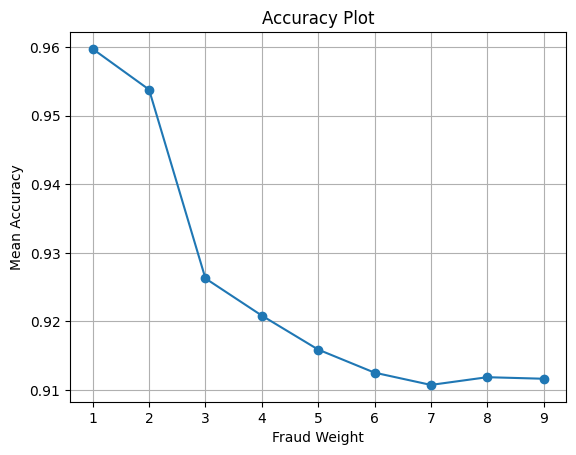

In [29]:
# Extract the results into a DataFrame
results = pd.DataFrame(grid.cv_results_)

# Extract mean test scores and corresponding weights
mean_test_scores = results['mean_test_score']
weights = [d[1] for d in results['param_class_weight']]

# Plot the line graph
plt.plot(weights, mean_test_scores, marker='o')
plt.xlabel('Fraud Weight')
plt.ylabel('Mean Accuracy')
plt.title('Accuracy Plot')
plt.grid(True)
plt.show()

## Precision and Recall Scores
<font color="Blue"> the bellow code show to use Precision and Recall scores. Also, it shows how to define a custom score (which is here the minimum value of both precesion and recall<font>

*These two are defined as:*  
**Precision** , also known as positive predictive value, is the ratio of correctly predicted positive observations to the total predicted positive observations.  
**Recall** also known as sensitivity or true positive rate, is the ratio of correctly predicted positive observations to all observations in the actual positive class.  
Precision is crucial when the cost of false positives is high, such as spam emails. Recall is crucial when the cost of false negatives is high, such as in cancer screening. So, If all predicted values match the real ones, you will have high precision even if not all cases are predicted. If many cases are predicted to be fraud, you will have high recall score even if so many prediction are not correct. Thus, a balance between these two scores is necessary

In [30]:
from sklearn.metrics import precision_score, recall_score

# we can use metrics by passing the real values and the predicted ones. 
print("Precision score", precision_score(y, pred)) # this to test the precision
print("Recall score", recall_score(y, pred)) # this is to test whether all cases are predicted 

Precision score 0.7814569536423841
Recall score 0.6020408163265306


In [31]:
# let's use the Grid Search with new metrics for scoring with optimizing one parameter
from sklearn.metrics import make_scorer # you have to use the method "make_scorer"
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(
    estimator = LogisticRegression(max_iter = 1000),
    param_grid = {'class_weight': [{0:1, 1:v} for v in range (1, 5)]},
    scoring = {'precision': make_scorer(precision_score), 'recall_score': make_scorer(recall_score)},
    refit = 'recall_score', # This is to determine which score to optimize over
    return_train_score=True, # this will give the training scores as well 
    cv = 4, # higher cross validation, higher accuracy, more time to run
    n_jobs = -1) # this is to allow parallel processing 

grid.fit(X, y);
pred = grid.predict(X)

print(f"Fraud Cases: {pred.sum()}")
pd.DataFrame(grid.cv_results_)

Fraud Cases: 189


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,params,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,...,split3_test_recall_score,mean_test_recall_score,std_test_recall_score,rank_test_recall_score,split0_train_recall_score,split1_train_recall_score,split2_train_recall_score,split3_train_recall_score,mean_train_recall_score,std_train_recall_score
0,0.900475,0.192182,0.054413,0.009253,"{0: 1, 1: 1}","{'class_weight': {0: 1, 1: 1}}",0.015071,1.0,0.975610,0.875000,...,0.142857,0.566327,0.342825,4,0.863946,0.585034,0.510204,0.687075,0.661565,0.132642
1,0.911051,0.240101,0.053064,0.013747,"{0: 1, 1: 2}","{'class_weight': {0: 1, 1: 2}}",0.013090,1.0,0.977273,0.857143,...,0.244898,0.612245,0.320415,3,0.870748,0.666667,0.625850,0.782313,0.736395,0.096490
2,0.815919,0.131957,0.037469,0.011504,"{0: 1, 1: 3}","{'class_weight': {0: 1, 1: 3}}",0.008179,1.0,0.955556,0.800000,...,0.326531,0.637755,0.293401,2,0.870748,0.707483,0.680272,0.816327,0.768707,0.077861
3,0.619928,0.087051,0.024834,0.007757,"{0: 1, 1: 4}","{'class_weight': {0: 1, 1: 4}}",0.007614,1.0,0.955556,0.809524,...,0.346939,0.647959,0.283290,1,0.870748,0.748299,0.714286,0.829932,0.790816,0.062418


In [32]:
# Let's now optimize the Grid Search using the minimum value of both precision and recall
# Using the min value here show us the best option that optimize both. 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, make_scorer

# Use this but with "make_socrer()" Method
"""
def min_recall_precision(X, y_true): 
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    return min(recall, precision)
"""

# define the new metric this way so no need for "make_socrer()" Method
def min_recall_precision(est, X, y_true, sample_weight=None): 
    y_pred = est.predict(X)
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    return min(recall, precision)

grid = GridSearchCV(
    estimator=LogisticRegression(max_iter=1000),
    param_grid={'class_weight': [{0: 1, 1: v} for v in np.linspace(1, 20, 30)]},
    scoring={'precision': make_scorer(precision_score), 
             'recall': make_scorer(recall_score),
             'min_both': min_recall_precision}, # use make_scorer() if you use the commented function above 
    refit='min_both',
    return_train_score=True,
    cv=10,
    n_jobs=-1
)
grid.fit(X, y);

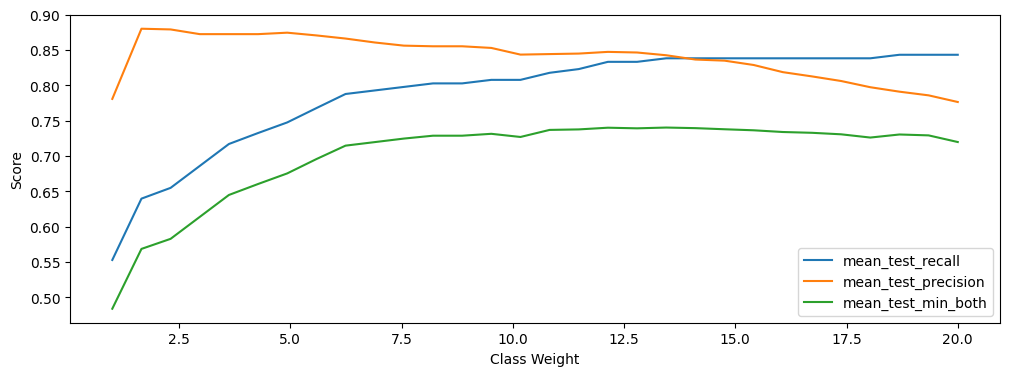

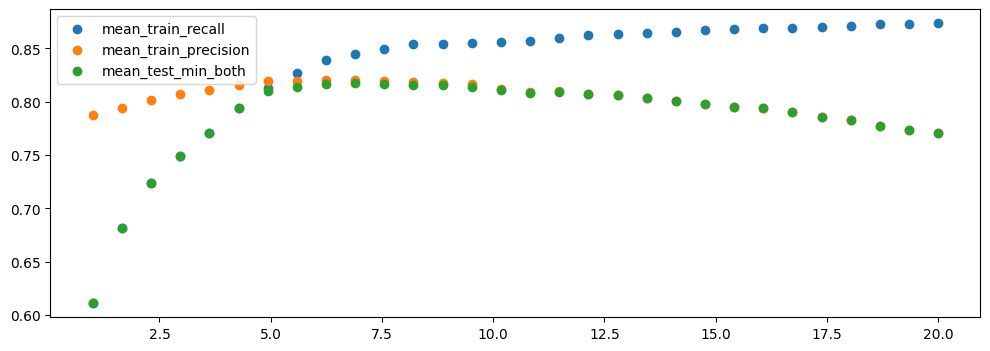

In [33]:
# plot the metrics

plt.figure(figsize=(12, 4))
df_results = pd.DataFrame(grid.cv_results_)
for score in ['mean_test_recall', 'mean_test_precision', 'mean_test_min_both']:
    plt.plot([_[1] for _ in df_results['param_class_weight']], 
             df_results[score], 
             label=score)
plt.xlabel("Class Weight")
plt.ylabel("Score")
plt.legend();

plt.figure(figsize=(12, 4))
df_results = pd.DataFrame(grid.cv_results_)
for score in ['mean_train_recall', 'mean_train_precision', 'mean_test_min_both']:
    plt.scatter(x=[_[1] for _ in df_results['param_class_weight']], 
                y=df_results[score.replace('test', 'train')], 
                label=score)
plt.legend();

## Isolation Forest Model 
Isolation Forest is unsupervised learning model that can be used to detect outliers or significantly different pattren in the data.  
Asume now that we will detect fraud by considering them outliers (since most cases are not fraud).  
This model give -1 for the outlier and 1 for not outlier.

In [34]:
from sklearn.ensemble import IsolationForest

mod = IsolationForest().fit(X)
# change values that equal -1 to 1, and other values to 0 (Important Step to use the data later)
pred = np.where(mod.predict(X) == -1, 1, 0) 
print(f"Fraud Cases: {pred.sum()}")

Fraud Cases: 2638


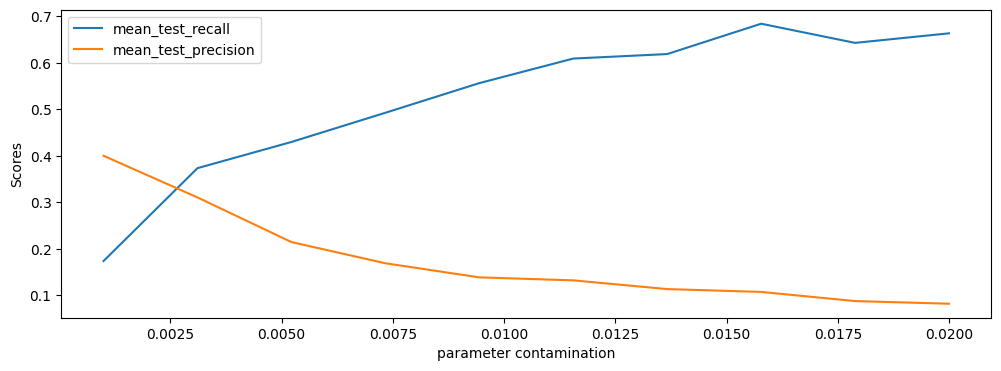

In [35]:
# Use Grid Search for the outlier method to optimize contamination parameter of the model

# Define a scoring method that can convert (-1 to 1) and (1 to 0), so Grid Search can work
def outlier_precision(mod, X, y):
    preds = mod.predict(X)
    return precision_score(y, np.where(preds == -1, 1, 0))

def outlier_recall(mod, X, y):
    preds = mod.predict(X)
    return recall_score(y, np.where(preds == -1, 1, 0))

grid = GridSearchCV(
    estimator=IsolationForest(),
    param_grid={'contamination': np.linspace(0.001, 0.02, 10)},
    scoring={'precision': outlier_precision, 
             'recall': outlier_recall},
    refit='precision',
    cv=5,
    n_jobs=-1
)
grid.fit(X, y); # Notice here that we are passing y to get the scoring (not for training the model)

plt.figure(figsize=(12, 4))
df_results = pd.DataFrame(grid.cv_results_)
for score in ['mean_test_recall', 'mean_test_precision']:
    plt.plot(df_results['param_contamination'], 
             df_results[score], 
             label=score)
plt.xlabel("parameter contamination")
plt.ylabel("Scores")
plt.legend();

# Meta Estimator 
A meta-estimator is an estimator that wraps around another estimator (or estimators) to enhance or extend their capabilities. There are many types of meta estimators, espacially in `scikit-lego` library.  
In the bellow code only the voting classifier method is introduced as an example using scikit learn library only.

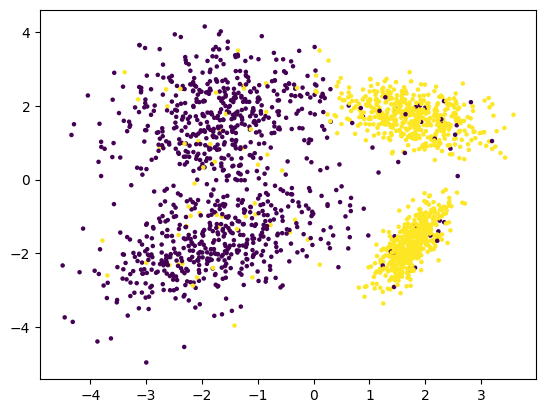

In [36]:
# assume we have this classification problem.
from sklearn.datasets import make_classification

# This dataset is created using " make_classification" method in scikit-learn.
X, y = make_classification(n_samples=2000, n_features=2,
                           n_redundant=0, random_state=21,
                           class_sep=1.75, flip_y=0.1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=5);

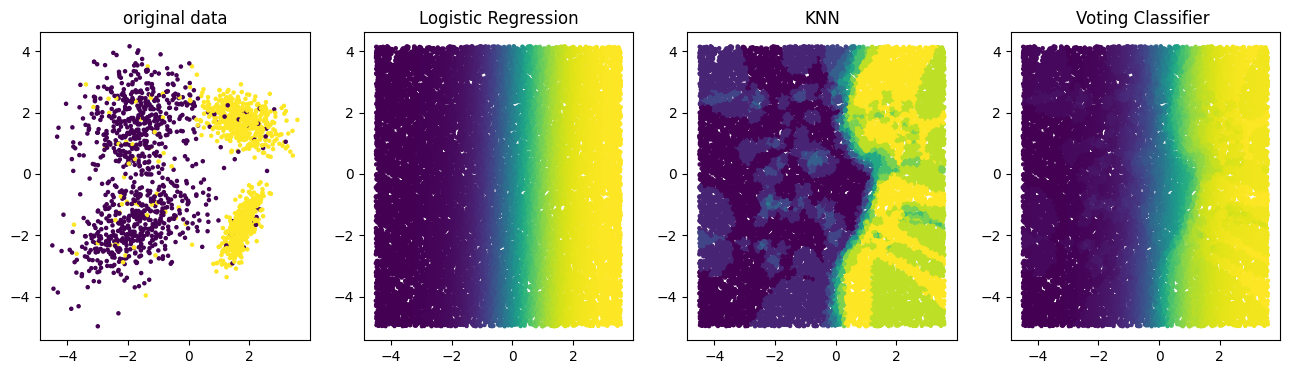

In [37]:
# For Classification, we can use "VotingClassifier". 
# Voting Classifier is a meta estimator that can combine multiple models by assigning weight for each model.

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

clf1 = LogisticRegression().fit(X, y)
clf2 = KNeighborsClassifier(n_neighbors=10).fit(X, y)
clf3 = VotingClassifier(estimators=[('clf1', clf1), ('clf2', clf2)],
                        voting='soft', # set the method to combine both models 
                        weights=[10.5, 2.5]) # set the Weight for both models [Logistic Regression, KKN]
clf3.fit(X, y)

""" Observe that Higher weight for Logistic Regression will tend to make the classification is based on a stright line
that seprate both resutls while higher weight for KKN will tend to make the classfication seeming-like a blending way"""
# Plot the result 
X_new = np.concatenate([
    np.random.uniform(np.min(X[:, 0]), np.max(X[:, 0]), (20000, 1)),
    np.random.uniform(np.min(X[:, 1]), np.max(X[:, 1]), (20000, 1))
], axis=1)
plt.figure(figsize=(16, 4))
plt.subplot(141)
plt.scatter(X[:, 0], X[:, 1], c=y, s=5)
plt.title("original data")
plt.subplot(142)
plt.scatter(X_new[:, 0], X_new[:, 1], c=clf1.predict_proba(X_new)[:, 1], s=5)
plt.title("Logistic Regression")
plt.subplot(143)
plt.scatter(X_new[:, 0], X_new[:, 1], c=clf2.predict_proba(X_new)[:, 1], s=5)
plt.title("KNN")
plt.subplot(144)
plt.scatter(X_new[:, 0], X_new[:, 1], c=clf3.predict_proba(X_new)[:, 1], s=5)
plt.title("Voting Classifier ");